In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

import sklearn as skl
from sklearn import svm
import sklearn.discriminant_analysis as disc_anl
import sklearn.linear_model as lin_mod

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
dataset = load_iris()

dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(dataset.keys())
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

df.iloc[:,[0,1,2,3]].corr("pearson")

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [5]:
df.groupby('target')[dataset.feature_names].corr()

sepal length (cm)  sepal width (cm)  \
target                                                          
0      sepal length (cm)           1.000000          0.742547   
       sepal width (cm)            0.742547          1.000000   
       petal length (cm)           0.267176          0.177700   
       petal width (cm)            0.278098          0.232752   
1      sepal length (cm)           1.000000          0.525911   
       sepal width (cm)            0.525911          1.000000   
       petal length (cm)           0.754049          0.560522   
       petal width (cm)            0.546461          0.663999   
2      sepal length (cm)           1.000000          0.457228   
       sepal width (cm)            0.457228          1.000000   
       petal length (cm)           0.864225          0.401045   
       petal width (cm)            0.281108          0.537728   

                          petal length (cm)  petal width (cm)  
target                                                         
0      sepal length (cm)           0.267176          0.278098  
       sepal width (cm)            0.177700          0.232752  
       petal length (cm)           1.000000          0.331630  
       petal width (cm)            0.331630          1.000000  
1      sepal length (cm)           0.754049          0.546461  
       sepal width (cm)            0.560522          0.663999  
       petal length (cm)           1.000000          0.786668  
       petal width (cm)            0.786668          1.000000  
2      sepal length (cm)           0.864225          0.281108  
       sepal width (cm)            0.401045          0.537728  
       petal length (cm)           1.000000          0.322108  
       petal width (cm)            0.322108          1.000000

d:\Programming\TeorStat\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


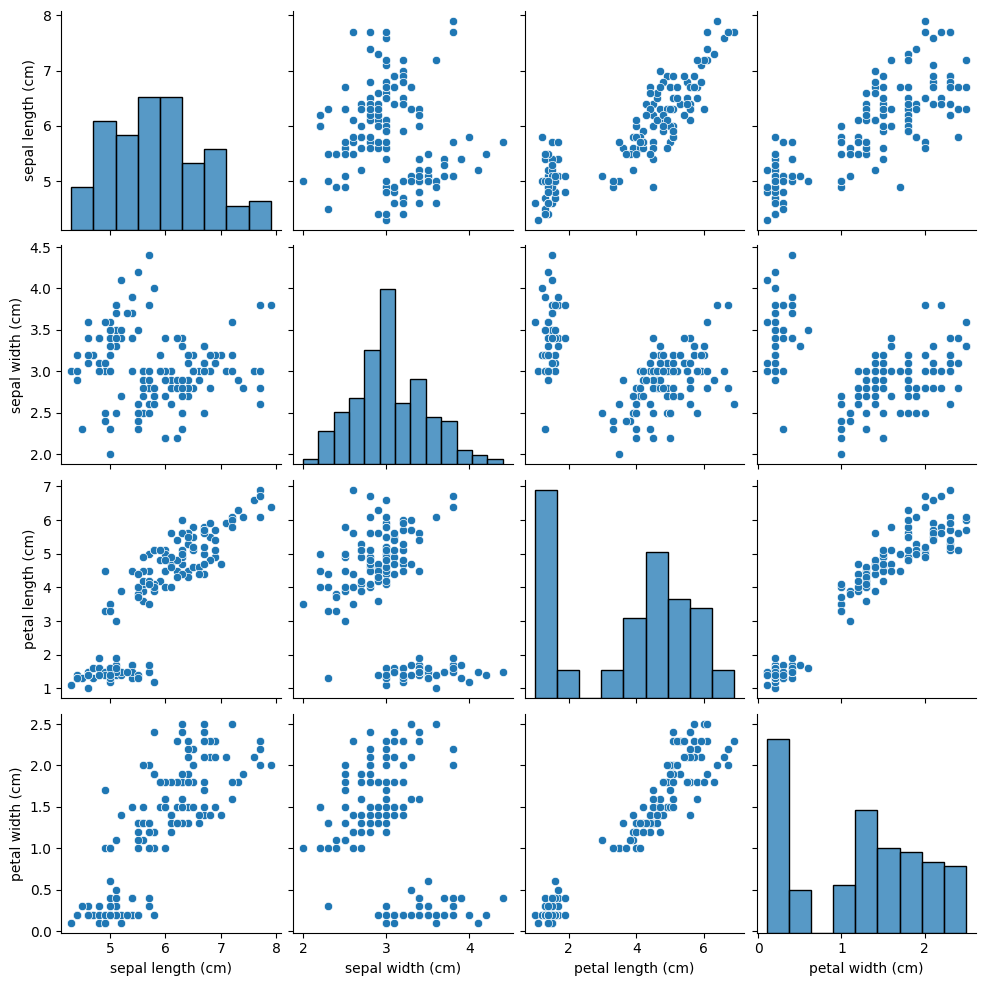

In [6]:
sns.pairplot(df.iloc[:,[0,1,2,3]])

In [7]:
X = dataset.data[:, :2]
y = dataset.target

methods = [
    (disc_anl.LinearDiscriminantAnalysis(), "LinearDiscriminantAnalysis"),
    (disc_anl.QuadraticDiscriminantAnalysis(), "QuadraticDiscriminantAnalysis"),
    (lin_mod.LogisticRegression(), "LogisticRegression"),
    (svm.SVC(kernel='linear'), "SVC_Linear"),
    (svm.SVC(kernel='poly'), "SVC_quad"),
]
for (m, n) in methods:
    m.fit(X, y)

In [8]:
def mesh(*xs, step=.02, padding=5):
    mesh_bases = []
    for x in xs:
        mesh_bases.append(np.arange(x.min() - padding, x.max() + padding, step))
    res = np.meshgrid(*mesh_bases)
    return res
X0, X1 = X[:, 0], X[:, 1]
xx, yy = mesh(X0, X1)

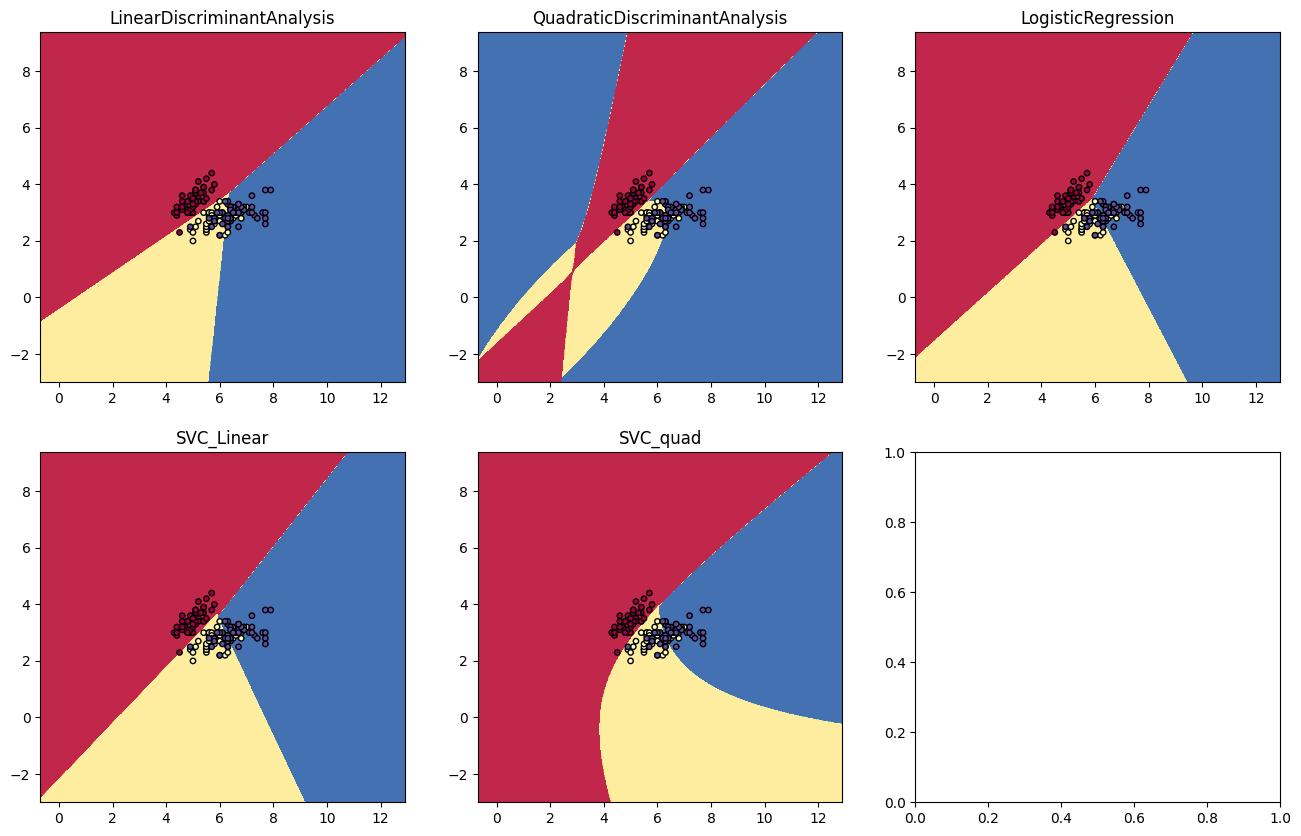

In [9]:
def creat_sub(ax, method, left_part, right_part):
    preds = method.predict(np.c_[left_part.ravel(), right_part.ravel()])
    preds = preds.reshape(left_part.shape) 
    out = ax.contourf(left_part, right_part, preds, cmap=mpl.colormaps['Spectral'], alpha=1)
    return out

fig, sub = plt.subplots(2, 3, figsize=(16,10))

for (method, name), ax in zip(methods, sub.ravel()):
    creat_sub(ax, method, xx, yy)
    ax.scatter(X0, X1, c=y, cmap=mpl.colormaps['Spectral'], s=15, edgecolors='black')
    ax.set_xlim([xx.min(), xx.max()]), ax.set_ylim([yy.min(), yy.max()])
    ax.set_title(name)

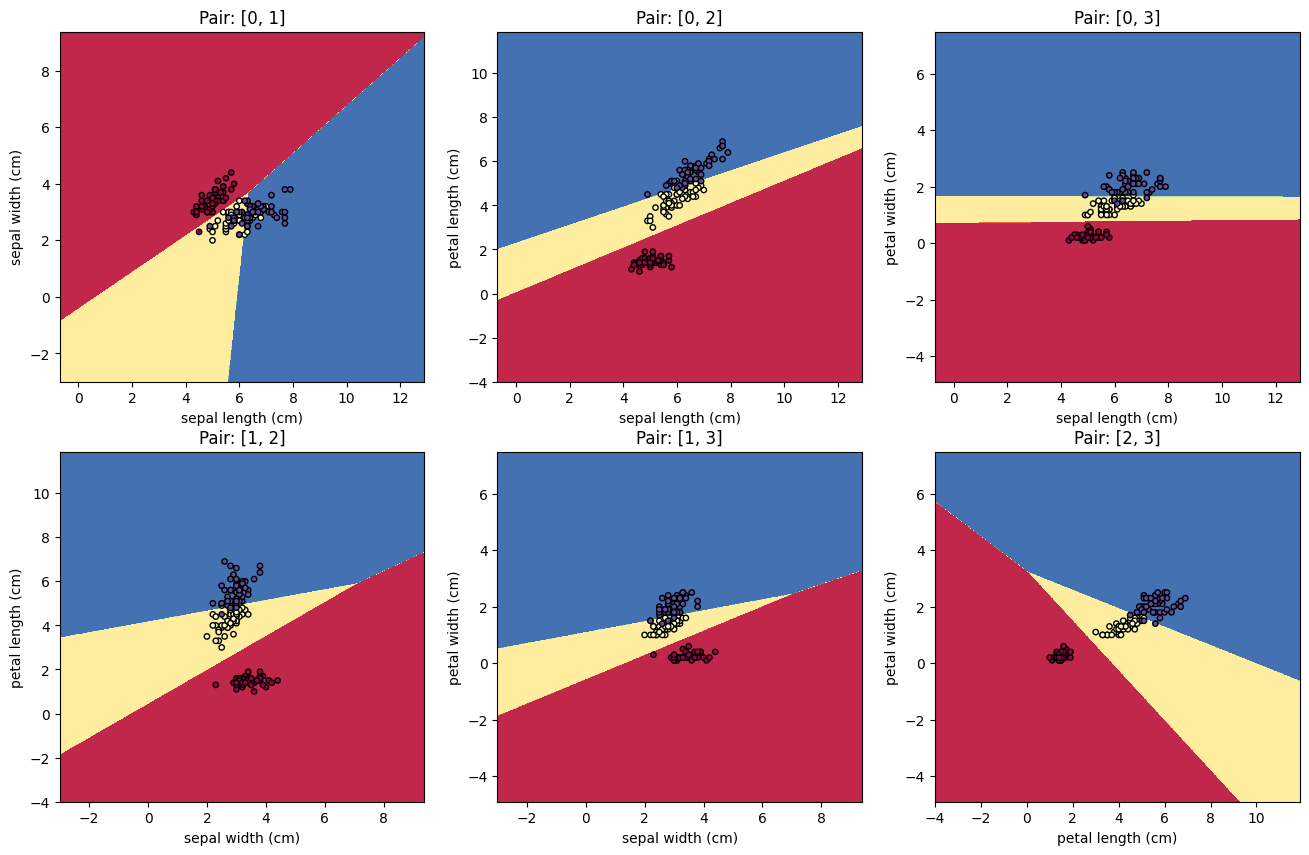

In [10]:
pairs = [[x, y] for x in range(0, 4) for y in range(x, 4) if x!=y]
fig, sub = plt.subplots(2, 3, figsize=(16,10))
for id, (ax, pair) in enumerate(zip(sub.ravel(), pairs)):
    LDA = disc_anl.LinearDiscriminantAnalysis()

    xs = dataset.data[:, pair]
    ys = dataset.target

    LDA.fit(xs, ys)

    x0, x1 = xs[:, 0], xs[:, 1]
    xx, yy = mesh(x0, x1)

    creat_sub(ax, LDA, xx, yy)
    ax.scatter(x0, x1, c=ys, cmap=mpl.colormaps['Spectral'], s=15, edgecolors='black')
    ax.set(title=f"Pair: {pair}",xlabel=dataset.feature_names[pairs[id][0]], ylabel=dataset.feature_names[pairs[id][1]], xlim=[xx.min(), xx.max()], ylim=[yy.min(), yy.max()])


In [11]:
from numpy.linalg import det, inv

In [12]:
def quadratic_discriminant_function(x, mean, cov, inv_cov):
    x_mean = x - mean
    return -0.5 * np.dot(np.dot(x_mean, inv_cov), x_mean) - 0.5 * np.log(np.linalg.det(cov))


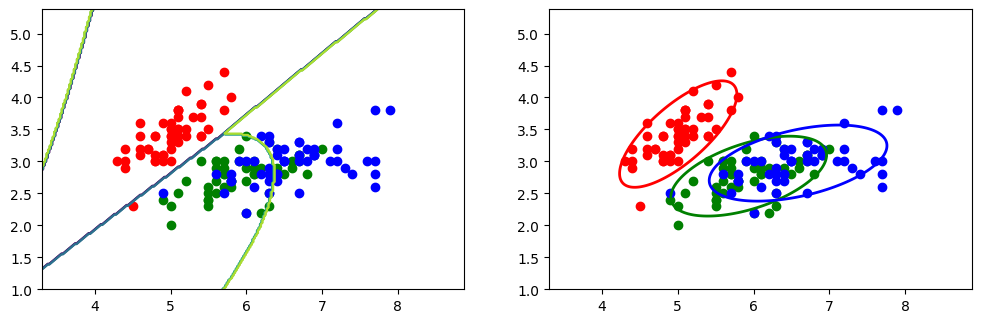

In [13]:
xs = dataset.data[:, :2]
ys = dataset.target
df = pd.DataFrame(xs)
df['tar'] = ys

classes  = [X[y == class_num] for class_num in [0, 1, 2]]
means    = [np.mean(class_data, axis=0) for class_data in classes]
covs     = [np.cov(class_data, rowvar=False) for class_data in classes]
inv_covs = [inv(cov) for cov in covs]

x0, x1 = xs[:, 0], xs[:, 1]
xx, yy = mesh(x0, x1, padding=1)
grid_points = np.c_[xx.ravel(), yy.ravel()]

qdfs = []
hats = []
for class_num in [0, 1, 2]:
    qdf = np.array([quadratic_discriminant_function(point, means[class_num], covs[class_num], inv_covs[class_num]) for point in grid_points])
    qdfs.append(qdf.reshape(xx.shape))
for point in grid_points:
    qdf = np.array([quadratic_discriminant_function(point, means[class_num], covs[class_num], inv_covs[class_num]) for class_num in [0, 1, 2]])
    hats.append(np.argmax(qdf))

preds = np.array(hats).reshape(xx.shape)

fig = plt.figure(figsize=(12, 8))
Gj
colors = ['Red', 'Green', 'Blue']
class_labels = ['Class 0', 'Class 1', 'Class 2']

plt.subplot(221)

plt.contour(xx, yy, preds)
for color, label in zip(colors, class_labels):
    plt.scatter(classes[class_labels.index(label)][:, 0], classes[class_labels.index(label)][:, 1], color=color, label=label, marker='o')


plt.subplot(222)

for pred, color, label in zip(qdfs, colors, class_labels):
    plt.contour(xx, yy, pred, levels=[0], colors=color, linewidths=2)
    plt.scatter(classes[class_labels.index(label)][:, 0], classes[class_labels.index(label)][:, 1], color=color, label=label, marker='o')

plt.show()

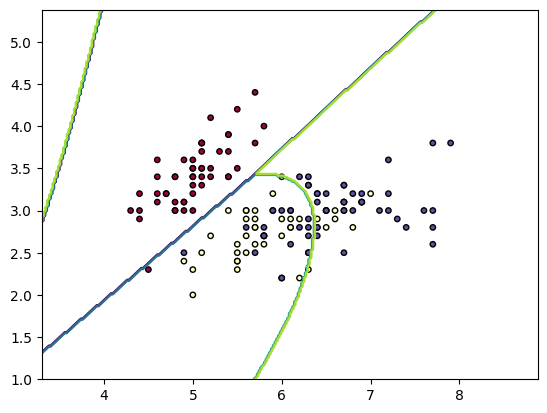

In [14]:
QDA = disc_anl.QuadraticDiscriminantAnalysis()
QDA.fit(xs, ys)

x0, x1 = xs[:, 0], xs[:, 1]
xx, yy = mesh(x0, x1, padding=1)
QDA_preds = QDA.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contour(xx, yy, QDA_preds.reshape(xx.shape))
plt.scatter(x0, x1, c=ys, cmap=mpl.colormaps['Spectral'], s=15, edgecolors='black')